<a href="https://colab.research.google.com/github/MuthuSelvam3112/Phase2/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#upload
import pandas as pd
from google.colab import files
uploaded=files.upload()
df=pd.read_csv("customer_support_tickets.csv")
df.head(50)

Saving customer_support_tickets.csv to customer_support_tickets.csv


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,NaN,Low,Social media,NaN,NaN,NaN
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,NaN,Critical,Social media,NaN,NaN,NaN
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaN,NaN,NaN
8,9,Nicolas Wilson,joshua24@example.com,60,Other,Fitbit Versa Smartwatch,2020-07-16,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Low,Social media,2023-06-01 10:32:47,NaN,NaN
9,10,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,NaN,Critical,Phone,2023-06-01 09:25:48,NaN,NaN


In [2]:
import pandas as pd
import re

# Step 1: Load the dataset
df = pd.read_csv('customer_support_tickets.csv')

# Step 2: Drop duplicate rows
df.drop_duplicates(inplace=True)

# Step 3: Drop rows with missing Ticket Subject, Description, or Resolution
df.dropna(subset=['Ticket Subject', 'Ticket Description', 'Resolution'], inplace=True)

# Step 4: Combine Subject + Description for chatbot input
df['combined_text'] = df['Ticket Subject'].astype(str) + " " + df['Ticket Description'].astype(str)

# Step 5: Normalize the text (lowercase, remove special characters)
def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

# Apply cleaning
df['cleaned_text'] = df['combined_text'].apply(clean_text)
df['cleaned_response'] = df['Resolution'].astype(str).apply(clean_text)

# Step 6: Remove short/irrelevant entries (optional)
df = df[df['cleaned_text'].str.len() > 10]
df = df[df['cleaned_response'].str.len() > 5]

# Step 7: Save cleaned dataset
df[['cleaned_text', 'cleaned_response']].to_csv('/content/cleaned_customer_support_tickets.csv', index=False)

print("Data cleaning completed and saved as 'cleaned_customer_support_tickets.csv'")

Data cleaning completed and saved as 'cleaned_customer_support_tickets.csv'


Top 10 most common query words:
[('the', 8748), ('productpurchased', 4583), ('issue', 4257), ('to', 3572), ('im', 3424), ('my', 3071), ('please', 2936), ('with', 2750), ('it', 2423), ('an', 2421)]


<ipython-input-3-385f8c441a64>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=query_df, x='word', y='count', palette='magma')


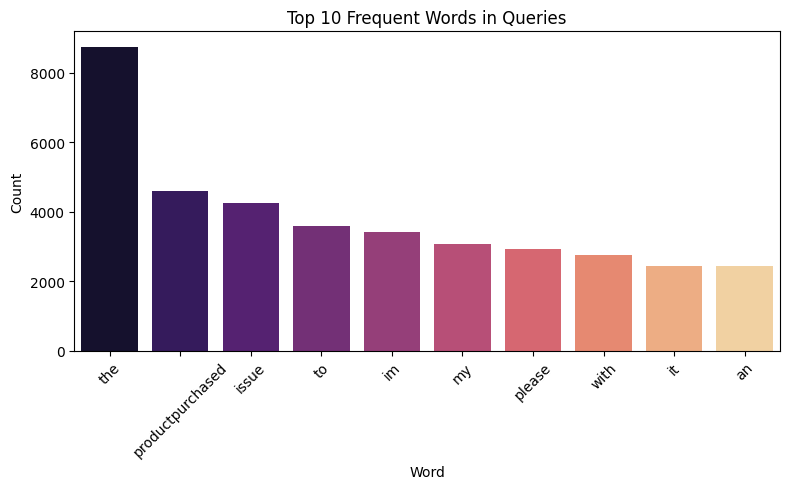

In [3]:
# Step 2: Import libraries
import pandas  as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

# Step 3: Load your cleaned dataset
df = pd.read_csv('/content/cleaned_customer_support_tickets.csv')  # Make sure the path is correct

# Step 4: Combine all words in queries for analysis
all_query_words = ' '.join(df['cleaned_text'].dropna())
query_word_freq = Counter(all_query_words.split())

# Step 5: Show top 10 frequent query words
print("Top 10 most common query words:")
print(query_word_freq.most_common(10))


# Step 8: Frequency Plot - Top 10 Query Words
query_df = pd.DataFrame(query_word_freq.most_common(10), columns=['word', 'count'])
plt.figure(figsize=(8, 5))
sns.barplot(data=query_df, x='word', y='count', palette='magma')
plt.title('Top 10 Frequent Words in Queries')
plt.ylabel('Count')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import nltk
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel
from textblob import TextBlob
import torch

# Make sure required libraries are installed
!pip install transformers textblob

# Load dataset
# Changed the file name to the correct cleaned dataset path
df = pd.read_csv("/content/cleaned_customer_support_tickets.csv")

# Assuming the cleaned data has 'cleaned_text' and 'cleaned_response'
# Adjusting subsequent steps to use 'cleaned_text'

# Extract issue description (using cleaned_text)
# This is a simple example, might need refinement based on text content
df['issue'] = df['cleaned_text'].str.extract(r'(?:issue|problem|error)[:\- ](.+)', expand=False)
# Fill potential NaNs after extraction
df['issue'].fillna('', inplace=True)


# Keyword tagging (using cleaned_text)
keywords = ['refund', 'login', 'delay', 'cancel']
df['keywords'] = df['cleaned_text'].fillna('').apply(lambda x: [kw for kw in keywords if kw in x.lower()])

# Issue type encoding (Deriving from cleaned_text as 'category' is not available)
# This is a simple approach; a more robust method might involve classification or topic modeling
df['issue_type'] = df['cleaned_text'].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else "general")
encoder = LabelEncoder()
df['issue_type_encoded'] = encoder.fit_transform(df['issue_type'])


# Sentiment score (using cleaned_text)
df['sentiment'] = df['cleaned_text'].fillna('').apply(lambda x: TextBlob(x).sentiment.polarity)

# BERT Embeddings
# Loading tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    # Ensure text is a string
    if not isinstance(text, str):
        text = str(text)
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        # Using .to('cpu') to ensure outputs are on CPU before converting to numpy
        outputs = model(**inputs).last_hidden_state[:, 0, :].squeeze().to('cpu')
    # Handle potential scalar output from squeeze on single items
    if outputs.ndim == 0:
        return outputs.unsqueeze(0).numpy()
    return outputs.numpy()


# Generate embedding for first 5 rows
df_subset = df.iloc[:5].copy()
# Apply embedding function to the 'cleaned_text' column
df_subset['embedding'] = df_subset['cleaned_text'].fillna('').apply(get_bert_embedding)

# Display the subset with new columns to verify
print(df_subset[['cleaned_text', 'issue', 'keywords', 'issue_type', 'issue_type_encoded', 'sentiment', 'embedding']])

<ipython-input-5-13246e90f74f>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['issue'].fillna('', inplace=True)


                                        cleaned_text  \
0  network problem im facing a problem with my pr...   
1  account access im having an issue with the pro...   
2  data loss im having an issue with the productp...   
3  data loss im having an issue with the productp...   
4  software bug im having an issue with the produ...   

                                               issue keywords issue_type  \
0  im facing a problem with my productpurchased t...       []    network   
1  with the productpurchased please assist if you...       []    account   
2  with the productpurchased please assist note t...       []       data   
3  with the productpurchased please assist 180079...       []       data   
4  with the productpurchased please assist 4 it i...       []   software   

   issue_type_encoded     sentiment  \
0                   8  2.479167e-01   
1                   0  2.500000e-01   
2                   3 -7.930164e-18   
3                   3  3.778409e-01   
4          

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 1: Load dataset
df = pd.read_csv('/content/cleaned_customer_support_tickets.csv')
df.columns = df.columns.str.strip()  # remove extra spaces

# Step 2: Check columns
print("Columns:", df.columns.tolist())

# Step 3: Add fake 'intent' column (for demo purposes)
df = df[['cleaned_text', 'cleaned_response']].dropna()
df['intent'] = df['cleaned_text'].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else "general")

# Step 4: Vectorize
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['intent']

# Step 5: Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Step 7: Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Step 8: Evaluation
print("SVM Report:")
print(classification_report(y_test, svm_pred))
print("Random Forest Report:")
print(classification_report(y_test, rf_pred))

# Step 9: Retrieval-based chatbot
def get_response(user_query):
    query_vec = vectorizer.transform([user_query])
    similarity = cosine_similarity(query_vec, X)
    best_match = np.argmax(similarity)
    return df.iloc[best_match]['cleaned_response']

# Step 10: Example
query = "issue with product setup"
print("\nUser Query:", query)
print("Chatbot Response:", get_response(query))

Columns: ['cleaned_text', 'cleaned_response']
SVM Report:
              precision    recall  f1-score   support

     account       0.83      0.96      0.89        25
     battery       0.93      0.96      0.95        28
cancellation       1.00      1.00      1.00        28
        data       0.97      0.97      0.97        34
    delivery       1.00      0.97      0.98        30
     display       1.00      1.00      1.00        35
    hardware       0.97      0.87      0.92        38
installation       1.00      1.00      1.00        24
     network       0.91      1.00      0.95        39
     payment       0.97      1.00      0.98        30
  peripheral       1.00      1.00      1.00        31
     product       0.99      0.98      0.98       128
      refund       1.00      0.93      0.97        45
    software       0.95      0.95      0.95        39

    accuracy                           0.97       554
   macro avg       0.97      0.97      0.97       554
weighted avg       0.9


SVM Evaluation:
Accuracy: 0.9693140794223827
Precision: 0.9711722954922933
Recall: 0.9693140794223827
F1 Score: 0.9695156720148956


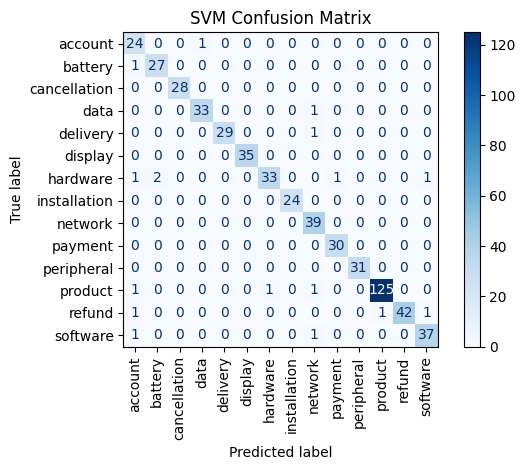


Random Forest Evaluation:
Accuracy: 0.9873646209386282
Precision: 0.9877849149027415
Recall: 0.9873646209386282
F1 Score: 0.9873713726500808


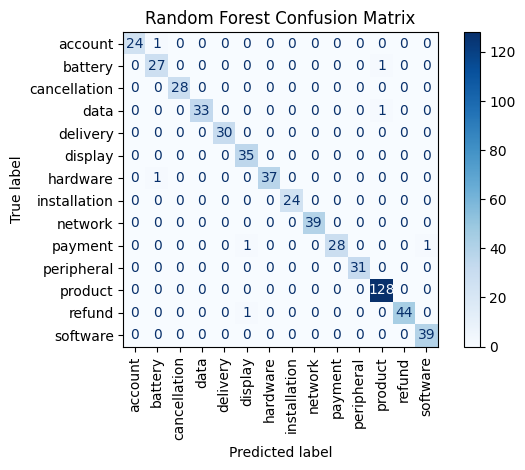

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using both models
svm_pred = svm.predict(X_test)
rf_pred = rf.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='weighted', zero_division=0))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted', zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(xticks_rotation=90, cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Evaluate SVM
evaluate_model("SVM", y_test, svm_pred)

# Evaluate Random Forest
evaluate_model("Random Forest", y_test, rf_pred)

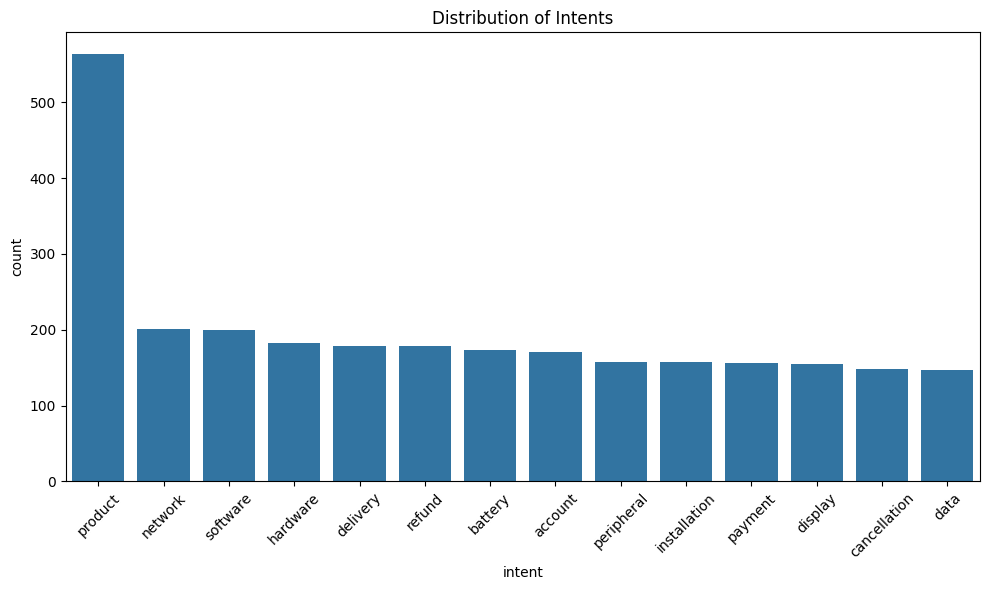

<ipython-input-8-cd351879266e>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics, palette='pastel')


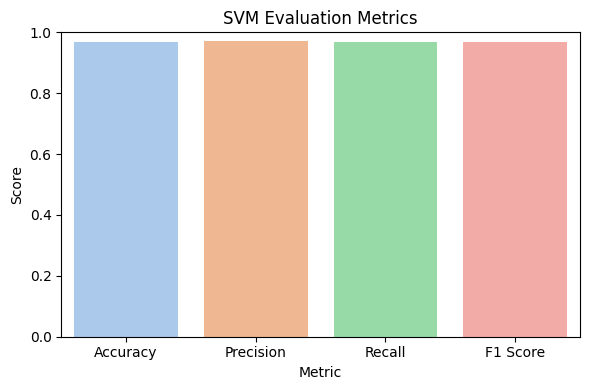

<ipython-input-8-cd351879266e>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics, palette='pastel')


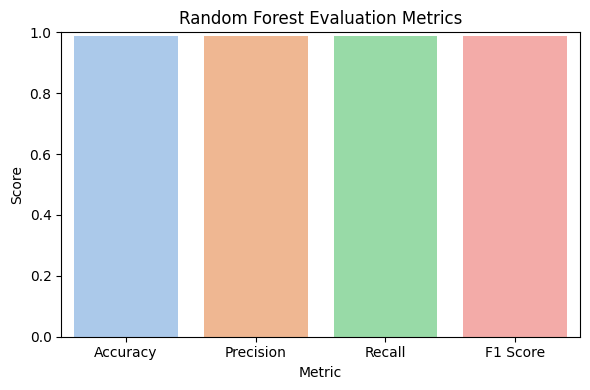

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-8-cd351879266e>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words, palette='mako')


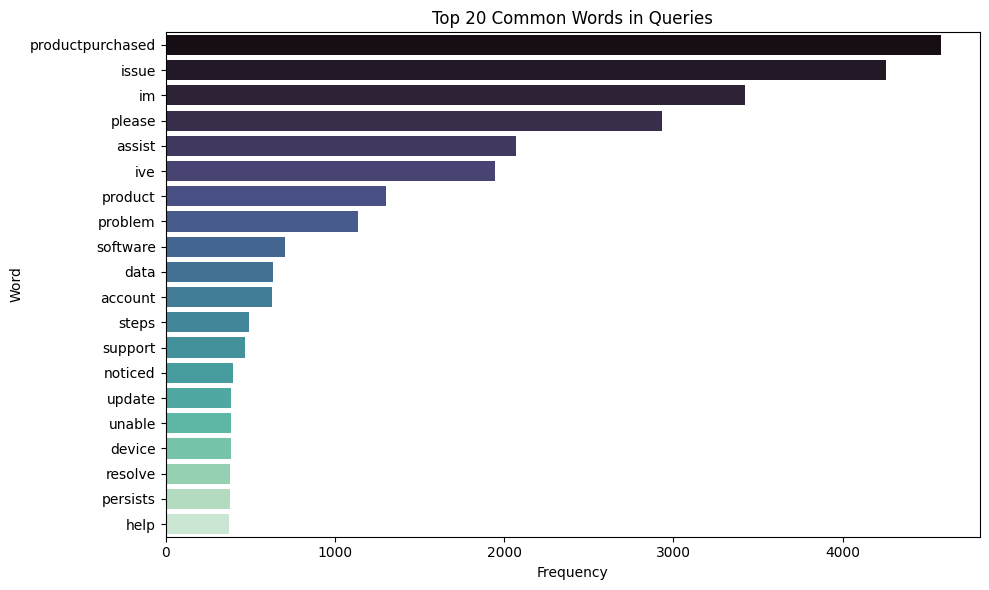

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load cleaned dataset
df = pd.read_csv('/content/cleaned_customer_support_tickets.csv')
df.columns = df.columns.str.strip()

# Assume 'intent' column is already created (if not, create dummy intent)
if 'intent' not in df.columns:
    df['intent'] = df['cleaned_text'].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else "general")

# 1. Intent Distribution Plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='intent', order=df['intent'].value_counts().index)
plt.title('Distribution of Intents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Chatbot Accuracy Report (using stored predictions)
def plot_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    metrics = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy, precision, recall, f1]
    })

    plt.figure(figsize=(6,4))
    sns.barplot(x='Metric', y='Score', data=metrics, palette='pastel')
    plt.ylim(0, 1)
    plt.title(f'{model_name} Evaluation Metrics')
    plt.tight_layout()
    plt.show()

# Run for SVM
plot_metrics(y_test, svm_pred, "SVM")

# Run for Random Forest
plot_metrics(y_test, rf_pred, "Random Forest")

# 3. EDA Findings: Most Common Words (Word Cloud optional if wordcloud installed)
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Get word frequency
words = ' '.join(df['cleaned_text']).lower().split()
words = [word for word in words if word not in stop_words]
word_freq = Counter(words)

# Top 20 words
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Word', data=common_words, palette='mako')
plt.title("Top 20 Common Words in Queries")
plt.tight_layout()
plt.show()